In [41]:
import pandas as pd

df = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv")
df = df.drop("Unnamed: 0", axis=1)
df.head()

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


In [42]:
valores = {
    "yes" : 1,
    "no" : 0
}

df["sold"] = df["sold"].map(valores)
df.head()

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [43]:
from datetime import datetime

ano_atual = datetime.today().year
df["model_age"] = ano_atual - df["model_year"]
df.head()

,mileage_per_year,model_year,price,sold,model_age
0,21801,2000,30941.02,1,24
1,7843,1998,40557.96,1,26
2,7109,2006,89627.50,0,18
3,26823,2015,95276.14,0,9
4,7935,2014,117384.68,1,10


In [44]:
df["km_per_year"] = df["mileage_per_year"]*1.60934
df.head()

,mileage_per_year,model_year,price,sold,model_age,km_per_year
0,21801,2000,30941.02,1,24,35085.22134
1,7843,1998,40557.96,1,26,12622.05362
2,7109,2006,89627.50,0,18,11440.79806
3,26823,2015,95276.14,0,9,43167.32682
4,7935,2014,117384.68,1,10,12770.11290


In [45]:
df = df.drop(["mileage_per_year","model_year"],axis=1)
df.head()

,price,sold,model_age,km_per_year
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


In [46]:
X = df[["price","model_age","km_per_year"]]
y = df["sold"]

In [47]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 20
np.random.seed(SEED)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25,stratify = y)

modelo = LinearSVC()
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)

acuracia = accuracy_score(y_test, previsoes)
print(f"Treinaremos o modelo com {len(X_train)} elementos e faremos o teste com {len(X_test)} elementos")
print(f"A acurácia foi {acuracia*100:.2f} %")

Treinaremos o modelo com 7500 elementos e faremos o teste com 2500 elementos
A acurácia foi 56.96 %


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [48]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy="stratified")
dummy_stratified.fit(X_train, y_train)
previsoes = dummy_stratified.predict(X_test)

acuracia = accuracy_score(y_test, previsoes)
print(f"Treinaremos o modelo com {len(X_train)} elementos e faremos o teste com {len(X_test)} elementos")
print(f"A acurácia foi {acuracia*100:.2f} %")

Treinaremos o modelo com 7500 elementos e faremos o teste com 2500 elementos
A acurácia foi 52.20 %


In [49]:
dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(X_train, y_train)
previsoes = dummy_mostfrequent.predict(X_test)

acuracia = accuracy_score(y_test, previsoes)
print(f"Treinaremos o modelo com {len(X_train)} elementos e faremos o teste com {len(X_test)} elementos")
print(f"A acurácia foi {acuracia*100:.2f} %")

Treinaremos o modelo com 7500 elementos e faremos o teste com 2500 elementos
A acurácia foi 58.00 %


In [50]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

raw_X_train,raw_X_test,y_train,y_test = train_test_split(X, y, test_size=0.25,stratify = y)

scaler = StandardScaler()
scaler.fit(raw_X_train)
X_train = scaler.transform(raw_X_train)
X_test = scaler.transform(raw_X_test)

modelo = SVC(gamma="auto")
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)

acuracia = accuracy_score(y_test, previsoes)
print(f"Treinaremos o modelo com {len(X_train)} elementos e faremos o teste com {len(X_test)} elementos")
print(f"A acurácia foi {acuracia*100:.2f} %")


Treinaremos o modelo com 7500 elementos e faremos o teste com 2500 elementos
A acurácia foi 77.16 %


In [62]:
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25,stratify = y)

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)

acuracia = accuracy_score(y_test, previsoes)
print(f"Treinaremos o modelo com {len(X_train)} elementos e faremos o teste com {len(X_test)} elementos")
print(f"A acurácia foi {acuracia*100:.2f} %")


Treinaremos o modelo com 7500 elementos e faremos o teste com 2500 elementos
A acurácia foi 78.88 %


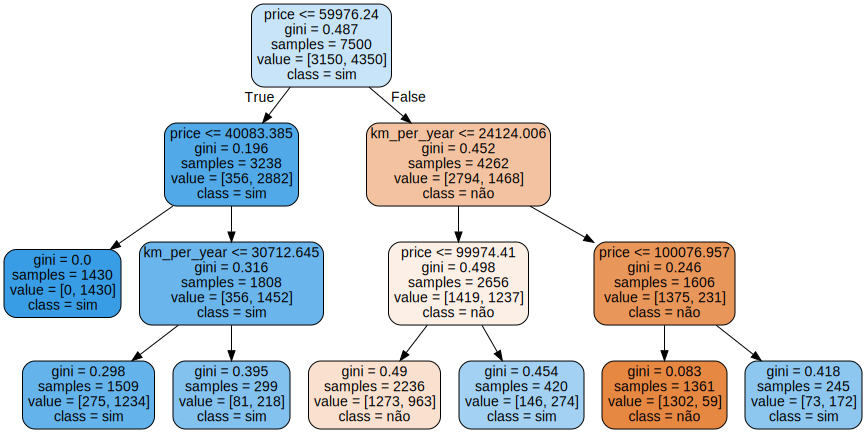

In [63]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo, out_file=None, feature_names=X.columns, filled=True, rounded=True, class_names=["não","sim"])
grafico = graphviz.Source(dot_data)
grafico